# Machine Learning Exercise

Name: MUTESASIRA EDWARD     

RegNo: 2023/HD07/3369U

In [2]:
# import necessary libraries
import pandas as pd # this is for dataframe maniplation
import numpy as np # this is for numerical / mathmatical compputing
import matplotlib.pyplot as plt # this is for visualization
import missingno as msno

# remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the data: diabetes dataset provided in the repo
data = pd.read_csv('assignment_data.csv')
data.head(5) # show the first 5 rows


,age,sex,on_art,days_art,temp,gcs,weight,fever,dur_fever,headache,...,platelets,sodium,potassium,csf_lactate,csf_glucose_mg,csf_lymph,csf_amt_removed,viralload,artnaive,Label
0,0.0,0.0,1.0,22.0,NaN,0.0,0.0,1.0,11.0,1.0,...,1.0,139.0,4.080910,4.8,1.0,NaN,10.0,1.432357e+06,1.0,0
1,0.0,1.0,1.0,NaN,35.282291,1.0,1.0,1.0,NaN,1.0,...,1.0,135.0,3.220714,NaN,1.0,NaN,10.0,NaN,0.0,1
2,1.0,0.0,0.0,101.0,NaN,1.0,0.0,0.0,NaN,0.0,...,1.0,134.0,5.261970,NaN,1.0,NaN,16.0,NaN,1.0,1
3,NaN,1.0,0.0,NaN,NaN,1.0,1.0,NaN,14.0,1.0,...,1.0,124.0,3.560370,3.0,1.0,NaN,16.0,NaN,0.0,1
4,NaN,1.0,1.0,49.0,NaN,0.0,0.0,NaN,NaN,1.0,...,1.0,128.0,4.394712,3.8,1.0,NaN,36.0,6.667831e+05,1.0,1


In [4]:
#Check dimentions of diabetes.csv data
data.shape

(2500, 28)

In [11]:
# Drop duplicates and fill NaN values with zeor
data.drop_duplicates(data)
data = data.fillna(0)
data.head(5)

,age,sex,on_art,days_art,temp,gcs,weight,fever,dur_fever,headache,...,platelets,sodium,potassium,csf_lactate,csf_glucose_mg,csf_lymph,csf_amt_removed,viralload,artnaive,Label
0,0.0,0.0,1.0,22.0,0.000000,0.0,0.0,1.0,11.0,1.0,...,1.0,139.0,4.080910,4.8,1.0,0.0,10.0,1.432357e+06,1.0,0
1,0.0,1.0,1.0,0.0,35.282291,1.0,1.0,1.0,0.0,1.0,...,1.0,135.0,3.220714,0.0,1.0,0.0,10.0,0.000000e+00,0.0,1
2,1.0,0.0,0.0,101.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,134.0,5.261970,0.0,1.0,0.0,16.0,0.000000e+00,1.0,1
3,0.0,1.0,0.0,0.0,0.000000,1.0,1.0,0.0,14.0,1.0,...,1.0,124.0,3.560370,3.0,1.0,0.0,16.0,0.000000e+00,0.0,1
4,0.0,1.0,1.0,49.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,1.0,128.0,4.394712,3.8,1.0,0.0,36.0,6.667831e+05,1.0,1


In [14]:
data.describe(include='all')

,age,sex,on_art,days_art,temp,gcs,weight,fever,dur_fever,headache,...,platelets,sodium,potassium,csf_lactate,csf_glucose_mg,csf_lymph,csf_amt_removed,viralload,artnaive,Label
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000
mean,0.197600,0.524000,0.431600,466.630000,16.171210,0.712000,0.616000,0.358000,13.163200,0.902800,...,0.829200,130.610800,2.697440,2.815400,0.998800,44.328800,14.584000,1.702057e+05,0.539200,0.840400
std,0.398268,0.499524,0.495398,838.328478,18.280915,0.452922,0.486455,0.479508,22.190519,0.296289,...,0.376409,7.581657,1.994809,2.604091,0.034627,40.093916,8.838585,4.150306e+05,0.498561,0.366308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,127.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000e+00,0.000000,1.000000
50%,0.000000,1.000000,0.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,130.000000,3.596931,3.100000,1.000000,60.000000,12.000000,0.000000e+00,1.000000,1.000000
75%,0.000000,1.000000,1.000000,577.000000,36.484917,1.000000,1.000000,1.000000,15.250000,1.000000,...,1.000000,135.000000,4.267007,4.600000,1.000000,79.000000,20.000000,1.497864e+05,1.000000,1.000000
max,1.000000,1.000000,1.000000,4199.000000,39.497840,1.000000,1.000000,1.000000,99.000000,1.000000,...,1.000000,148.000000,6.594044,10.100000,1.000000,100.000000,49.000000,2.987758e+06,1.000000,1.000000


In [12]:
# transform the dataset by filling in values that are min = 0 but are not accurate e.g Insulin min=0
# chose the best way you think to replace those values, whether with the mean value e.t.c

# create a copy of the original dataset with a new name
cleaned_data = data.copy()
""" 
# replace the 0 values with the mean of non-zero values in the Glucose column
mean_g = cleaned_data[cleaned_data["Glucose"] != 0]["Glucose"].mean()
cleaned_data["Glucose"] = cleaned_data["Glucose"].replace(0, mean_g)

# replace the 0 values with the mean of non-zero values in the BloodPressure column
mean_bp = cleaned_data[cleaned_data["BloodPressure"] != 0]["BloodPressure"].mean()
cleaned_data["BloodPressure"] = cleaned_data["BloodPressure"].replace(0, mean_bp)

# replace the 0 values with the mean of non-zero values in the Insulin column
mean_i = cleaned_data[cleaned_data["Insulin"] != 0]["Insulin"].mean()
cleaned_data["Insulin"] = cleaned_data["Insulin"].replace(0, mean_i)

# replace the 0 values with the mean of non-zero values in the BMI column
mean_bmi = cleaned_data[cleaned_data["BMI"] != 0]["BMI"].mean()
cleaned_data["BMI"] = cleaned_data["BMI"].replace(0, mean_bmi)

# replace the 0 values with the mean of non-zero values in the SkinThickness column
mean_st = cleaned_data[cleaned_data["SkinThickness"] != 0]["SkinThickness"].mean()
cleaned_data["SkinThickness"] = cleaned_data["SkinThickness"].replace(0, mean_st)

# clean the data by removing any duplicates and handling missing values
cleaned_data.drop_duplicates(inplace=True)
cleaned_data.dropna(inplace=True)
"""
# printing the first 5 rows
cleaned_data.head(5)

,age,sex,on_art,days_art,temp,gcs,weight,fever,dur_fever,headache,...,platelets,sodium,potassium,csf_lactate,csf_glucose_mg,csf_lymph,csf_amt_removed,viralload,artnaive,Label
0,0.0,0.0,1.0,22.0,0.000000,0.0,0.0,1.0,11.0,1.0,...,1.0,139.0,4.080910,4.8,1.0,0.0,10.0,1.432357e+06,1.0,0
1,0.0,1.0,1.0,0.0,35.282291,1.0,1.0,1.0,0.0,1.0,...,1.0,135.0,3.220714,0.0,1.0,0.0,10.0,0.000000e+00,0.0,1
2,1.0,0.0,0.0,101.0,0.000000,1.0,0.0,0.0,0.0,0.0,...,1.0,134.0,5.261970,0.0,1.0,0.0,16.0,0.000000e+00,1.0,1
3,0.0,1.0,0.0,0.0,0.000000,1.0,1.0,0.0,14.0,1.0,...,1.0,124.0,3.560370,3.0,1.0,0.0,16.0,0.000000e+00,0.0,1
4,0.0,1.0,1.0,49.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,1.0,128.0,4.394712,3.8,1.0,0.0,36.0,6.667831e+05,1.0,1


<Axes: >

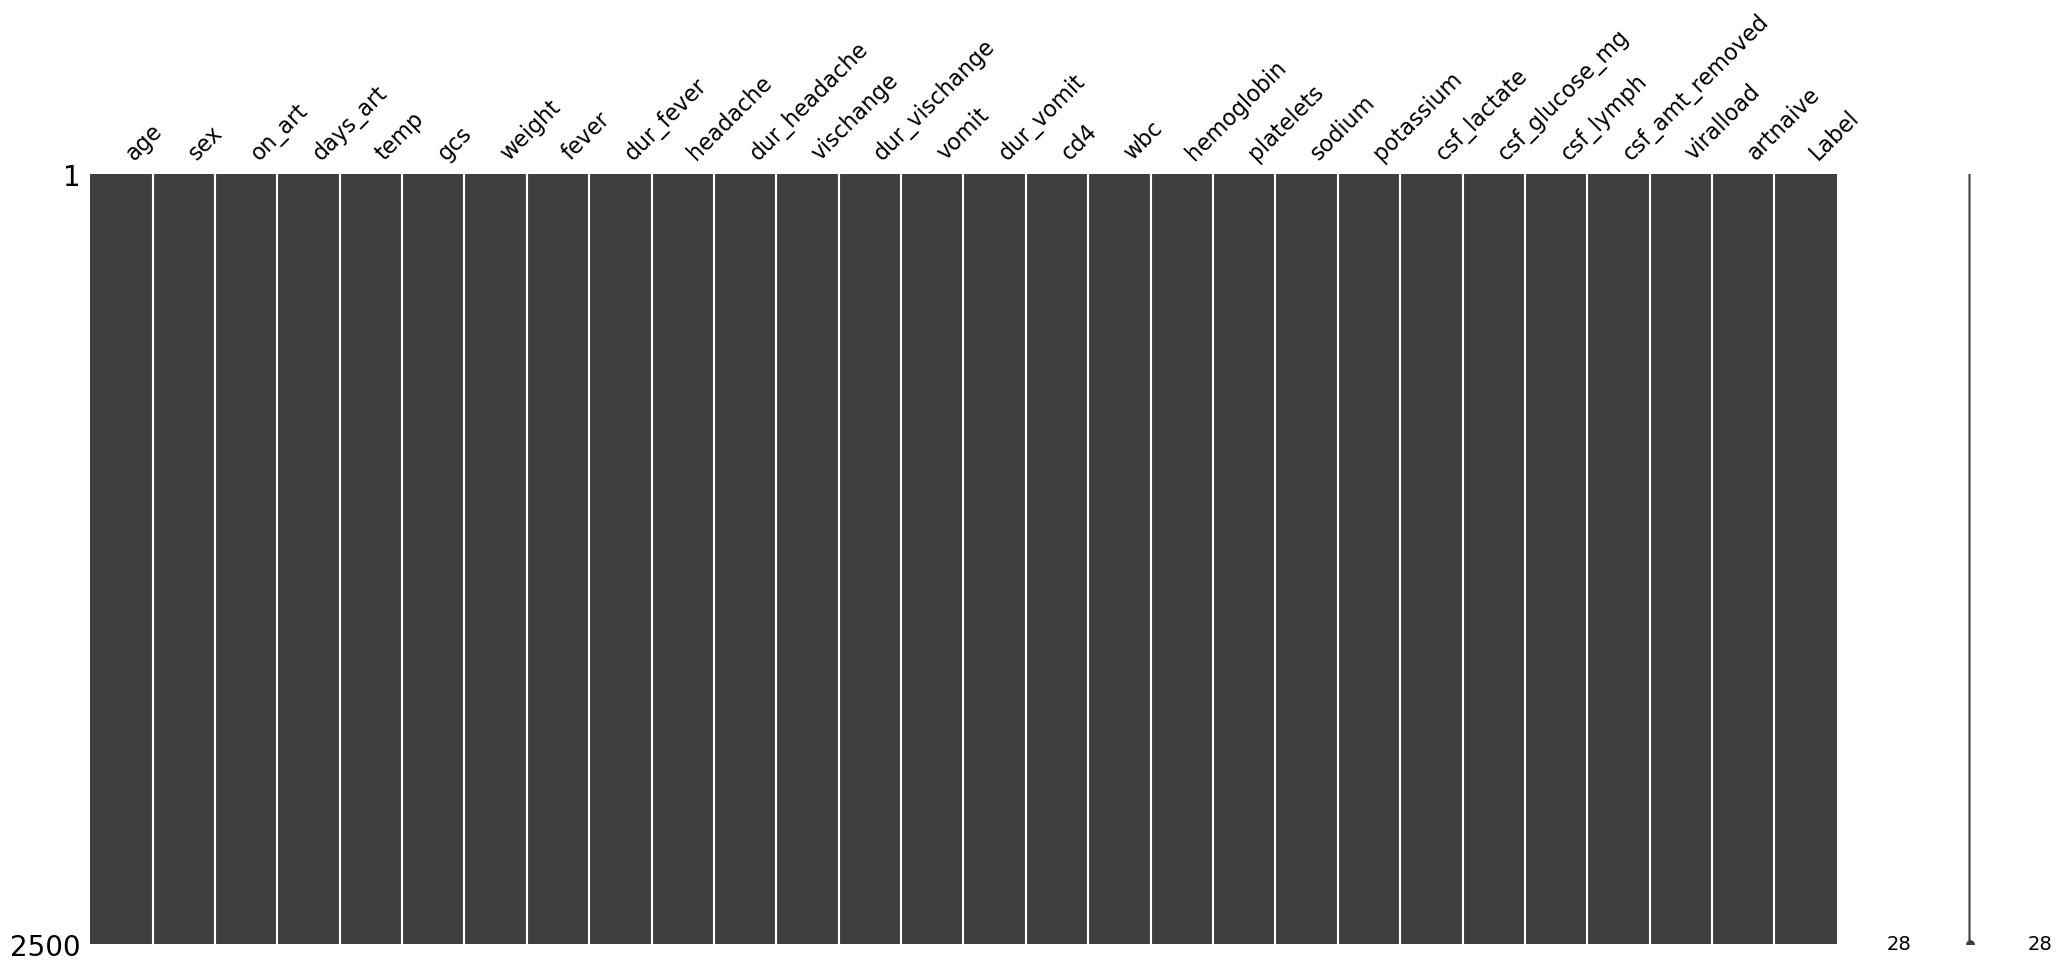

In [13]:
# importing missingno packgage

# ploting missingness matrix with missingno
msno.matrix(cleaned_data)

In [ ]:
#install pandas profiling
%pip install ydata-profiling

In [6]:
# Importing profie_report from ydata_profiling
from ydata_profiling import profile_report
# create an EDA report using pandas profiling
profile = cleaned_data.profile_report()
profile.to_file(output_file="eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# install seaborn and plot at least 2-3 variables of your choice
# after plotting explain what the plot is communicating.

In [7]:
# Install Seaborb
#%pip install seaborn
# Import Seaborn
import seaborn as sns

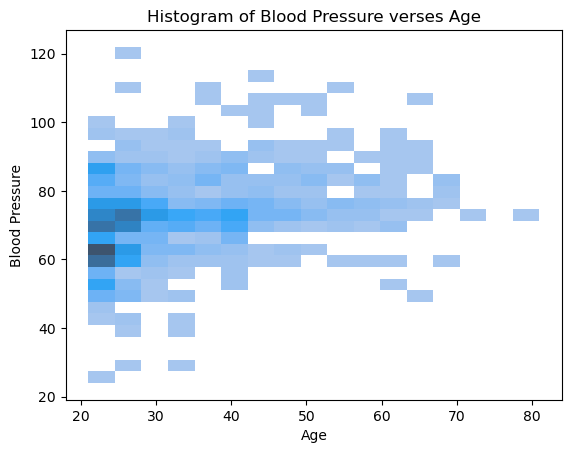

In [6]:
# Create histograms for Blood Pressure Vs Age
sns.histplot(data=cleaned_data, x="Age", y="BloodPressure", kde=True)
plt.title("Histogram of Blood Pressure verses Age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.show()

The y-axis represents the range of Blood Pressure values, and the x-axis represents the Age of individuals  of the poupltion falling within each Blood Pressure range. From the histogram, we can observe that most of the individuals have blood pressure ranging from approximately 60 to 85 with the peak of 70

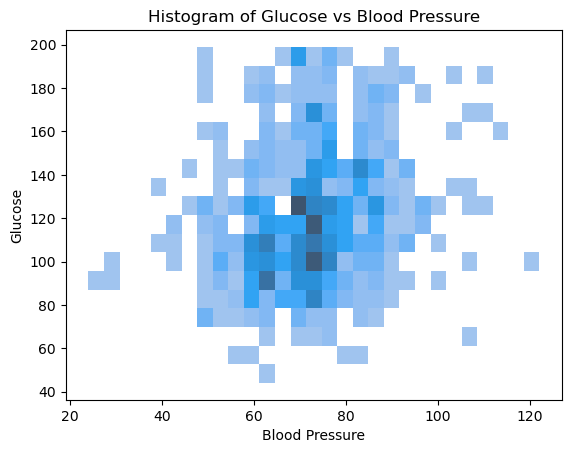

In [9]:
# Create histograms for BloodPressure vs Glucose
sns.histplot(data=cleaned_data, x="BloodPressure",y="Glucose", kde=True)
plt.title("Histogram of Glucose vs Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Glucose")
plt.show()

We can observe that when glucose level is approximately 120, the blood pressure is around 70 which is normal and this reflects the majority of the individuals in the population.

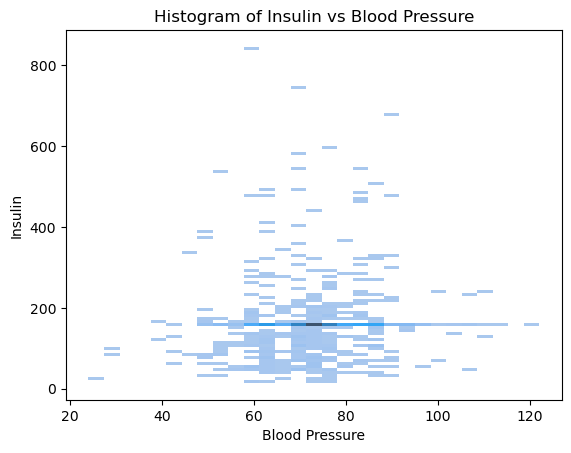

In [8]:
# Create histograms for Blood Pressure vs Insulin
sns.histplot(data=cleaned_data, x="BloodPressure",y="Insulin", kde=True)
plt.title("Histogram of Insulin vs Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Insulin")
plt.show()

We can observe that for most individuals with Blood Pressure between 70 to 80, have insulin level between 200 to 50. 